1. Download Dataset

In [ ]:
!pip install -q kaggle

1.1 Uploaded kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json #fungsi untuk memberikan izin akses file

1.2 Processing download

In [1]:
!kaggle datasets download -d akhsaydattatraykhare/diabetes-dataset
    #diabetes-dataset.zip: Skipping, found more recently modified local copy (use --force to force dowload)

import zipfile
with zipfile.ZipFile('diabetes-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

403 - Forbidden - Permission 'datasets.get' was denied


2. Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

3. Load & Display Dataset

In [3]:
df = pd.read_csv('/content/diabetes.csv')
display(df.head(2)) # display first record of data
display(df.tail(2)) # display last 4 record of data
display(df.sample(4)) # display randomly any number of record of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
200,0,113,80,16,0,31.0,0.874,21,0
321,3,112,74,30,0,31.6,0.197,25,1
230,4,142,86,0,0,44.0,0.645,22,1
593,2,82,52,22,115,28.5,1.699,25,0


3.1 The shape of the dataset

In [4]:
#number of row and columns
df.shape

(768, 9)

3.2 List types of all columns

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

3.3 Info of the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


3.4 Summary of the dataset

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Check Null Value

    4. Data Cleaning

4.1 Drp the duplicate

In [8]:
# check the dhape before drop duplicate
df.shape


df=df.drop_duplicates()

# check the shape after drop the duplicate
df.shape

(768, 9)

4.2 check the NULL value

In [9]:
# check off null values,
# check the missing value in my collumn,
# display number of null value in every column in dataset.
df.isnull().sum()

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Check the no.of Zero value in dataset

In [10]:
print ('No of zero value in Glucose', df[df['Glucose']==0].shape[0])

print ('No of zero value in BloodPressure', df[df['BloodPressure']==0].shape[0])

print ('No of zero value in skinThickness', df[df['SkinThickness']==0].shape[0])

print ('No of zero value in Insulin', df[df['Insulin']==0].shape[0])

print ('No of zero value in BMI', df[df['BMI']==0].shape[0])

No of zero value in Glucose 5
No of zero value in BloodPressure 35
No of zero value in skinThickness 227
No of zero value in Insulin 374
No of zero value in BMI 11


Replace the no.of zero value with mean of columns

no of zero value in Glucose 0
Negative (0): 500
Positive (1): 268


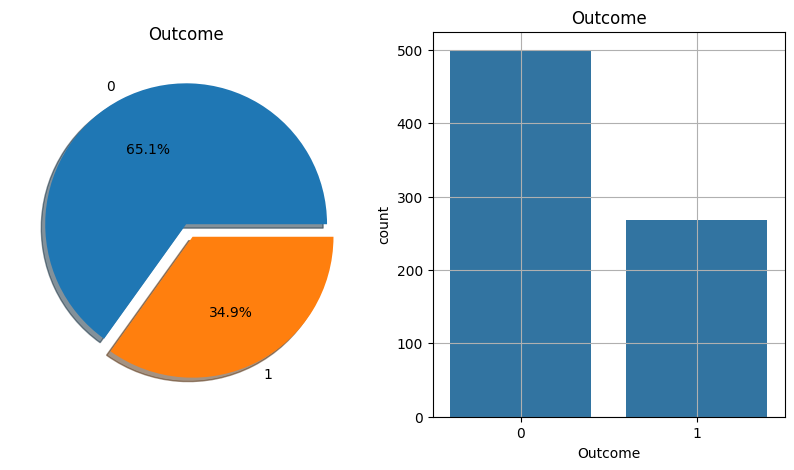

In [11]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
print('no of zero value in Glucose',df[df['Glucose']==0].shape[0])

df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

df.describe()

# utcome count plot
f, ax=plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
N,P = df['Outcome'].value_counts()
print('Negative (0):',N)
print('Positive (1):',P)
plt.grid()
plt.show()

Histogram of aech feature

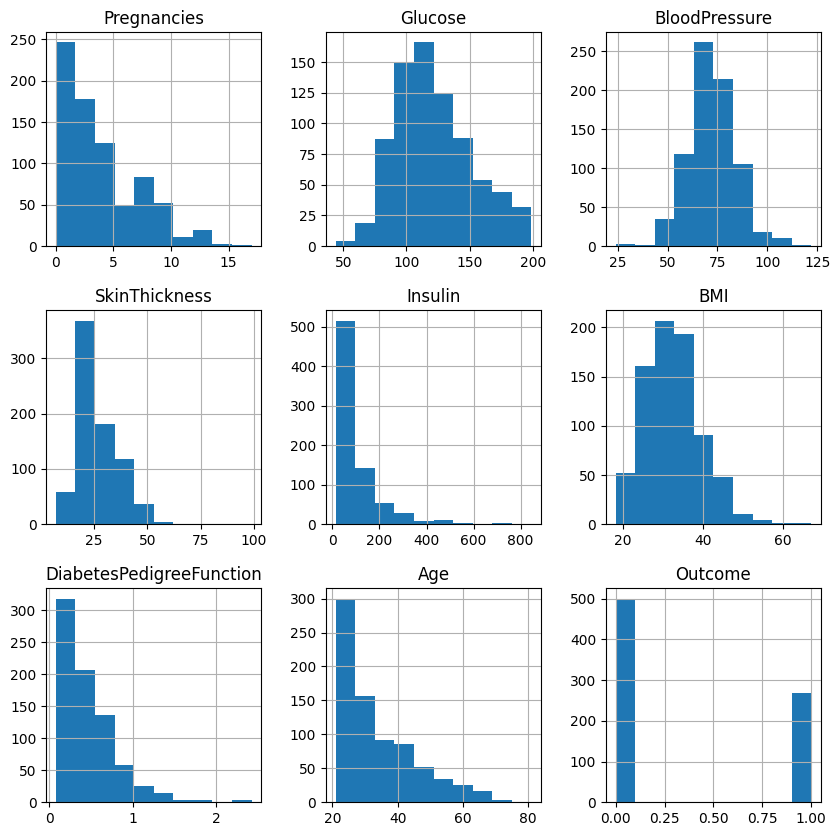

In [12]:
df.hist(bins=10,figsize=(10,10))
plt.show()

Scatter Plaot

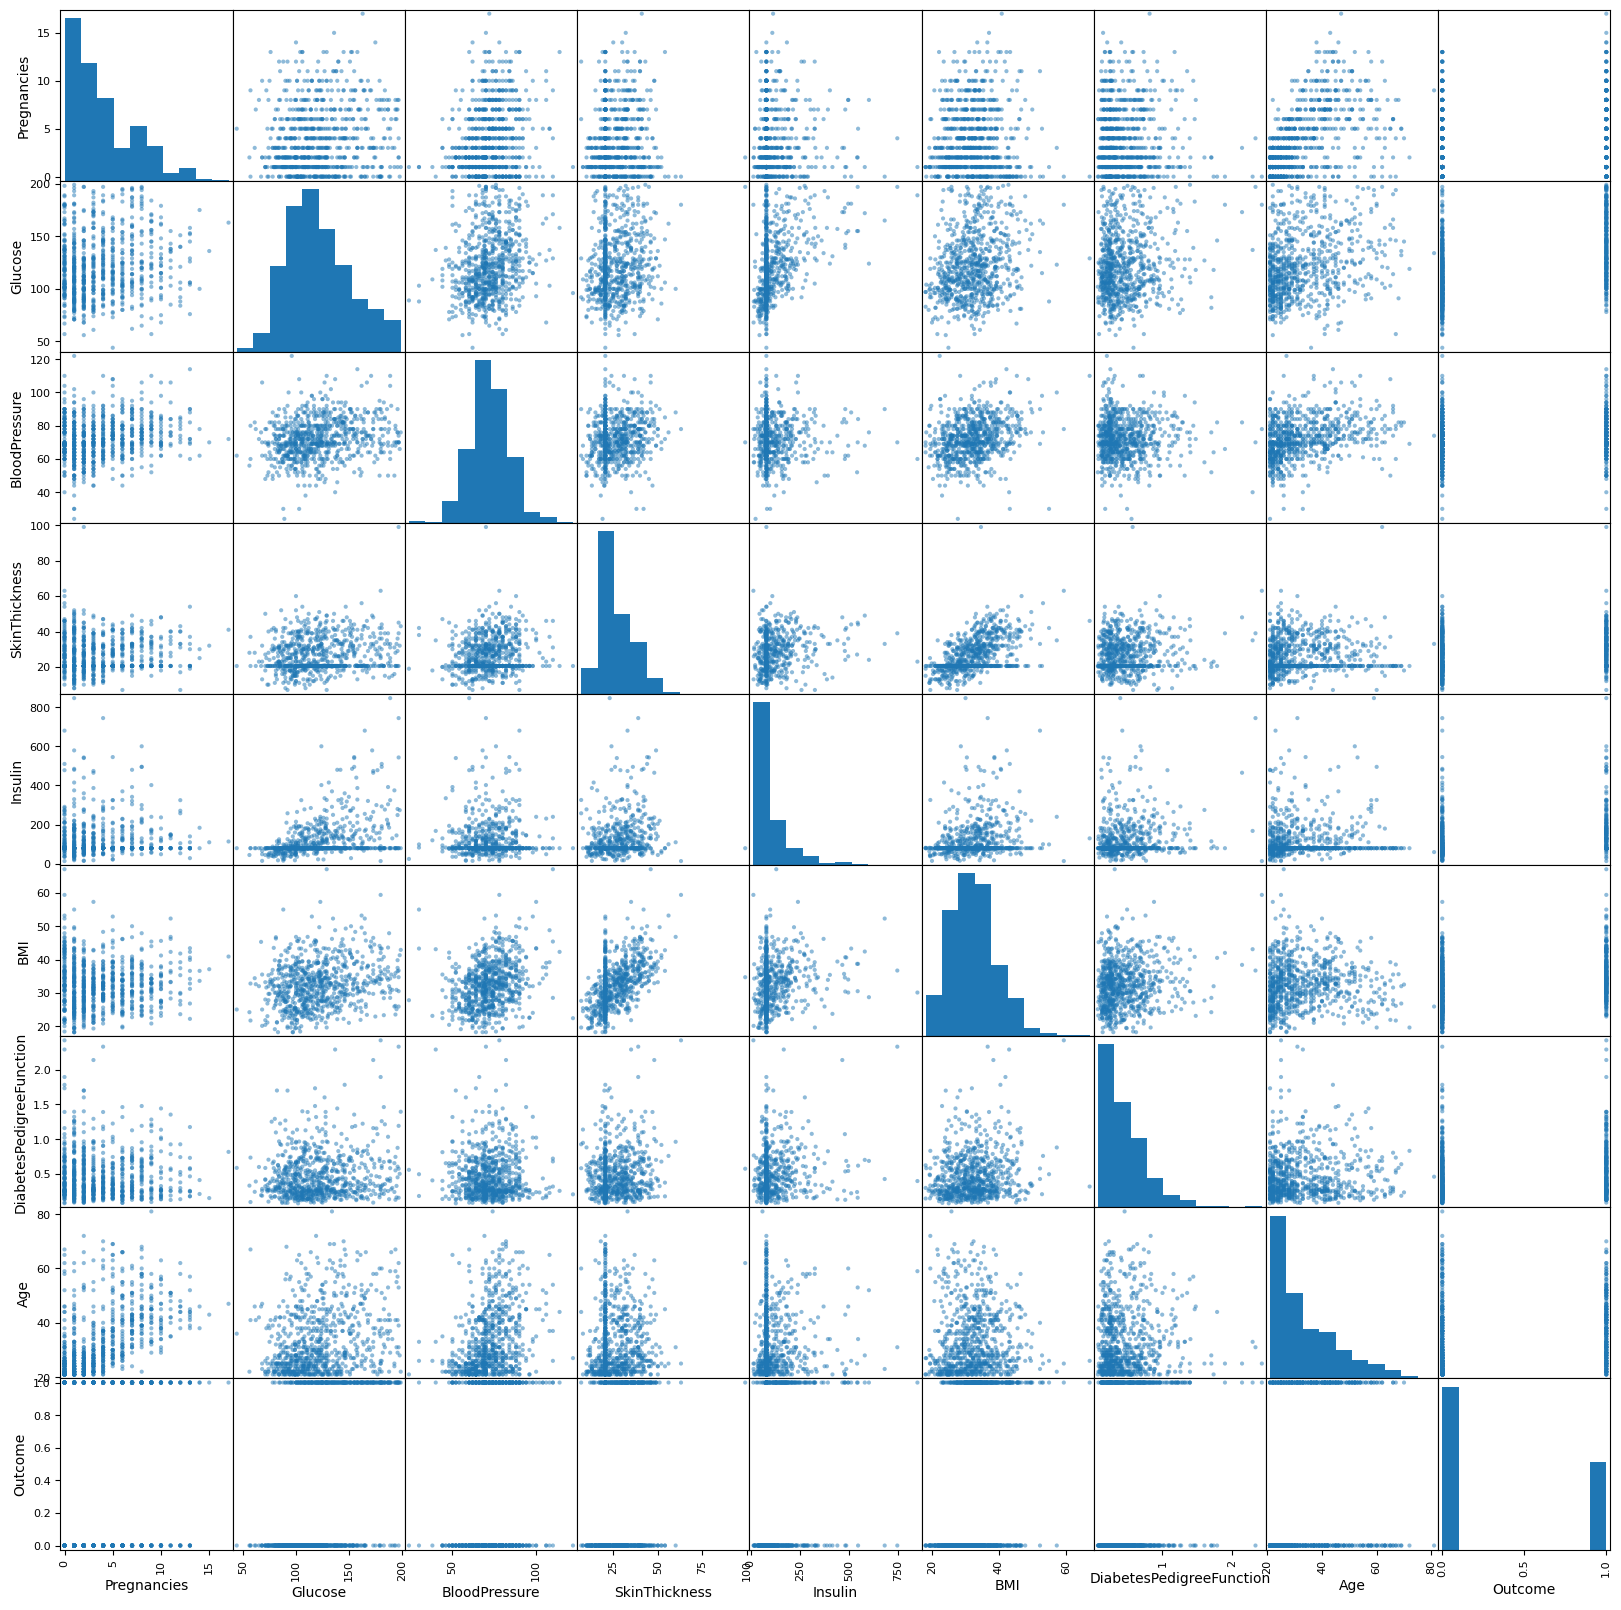

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20,20));

Analyzing relationship between variable

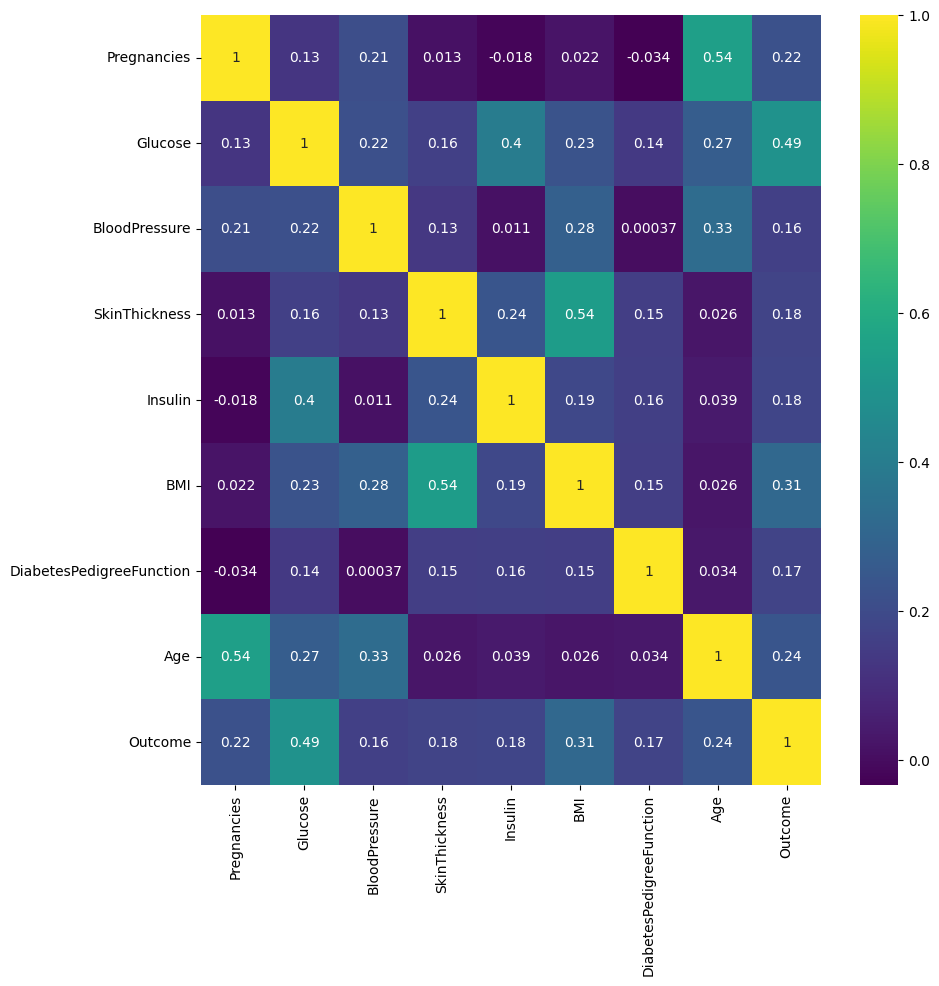

In [22]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis")

5. Split the data frame into X & y

In [23]:
target_name = 'Outcome'
y = df[target_name]
x = df.drop(target_name, axis=1)

x.head()

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

6. Apply Feature Scalling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
SSX = scaler.transform(x)

7. Train Test split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

x_train.shape, y_train.shape

x_test.shape, y_test.shape

((154, 8), (154,))

8. Build the Classification Algorithms SVM

In [26]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train, y_train)

SVC()

9. Making Prediction

9.4) SVM

In [27]:
sv_pred=sv.predict(x_test)

sv_pred.shape

(154,)

10) Model Evaluation.

10.1) Train Score and Test Score

In [28]:
#Train score & test score SVM
from sklearn.metrics import accuracy_score
print("Train Accuracy of SVM", sv.score(x_train, y_train)*100)
print("Accuracy (test) score of SVM", sv.score(x_test, y_test)*100)
print("Accuracy (test) score of SVM", accuracy_score(y_test, sv_pred)*100)


Train Accuracy of SVM 81.92182410423453
Accuracy (test) score of SVM 83.11688311688312
Accuracy (test) score of SVM 83.11688311688312


Confusion Matrix of "SVM"

Classification Report of SVM: 
               precision    recall  f1-score   support

           0     0.8198    0.9381    0.8750        97
           1     0.8605    0.6491    0.7400        57

    accuracy                         0.8312       154
   macro avg     0.8401    0.7936    0.8075       154
weighted avg     0.8349    0.8312    0.8250       154

TN - True Negative 91
FP - False Positive 6
FN - False Negative 20
TP - True Positive 37
Accuracy Rate of SVM:83.11688311688312
Misclassification Rate of SVM :16.883116883116884


<Axes: >

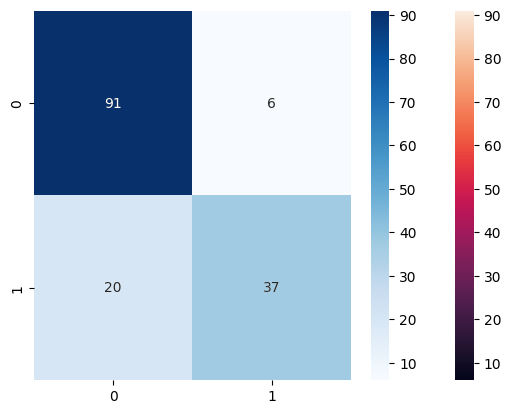

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
# Confusion matrix of Logistic Regression
cm=confusion_matrix(y_test,sv_pred)
cm

sns.heatmap(confusion_matrix(y_test, sv_pred),annot=True,fmt='d')

print ('Classification Report of SVM: \n', classification_report(y_test,sv_pred,digits=4 ))

TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm,[1,1]

TN, FP, FN, TP

# Making the Confusion Matrix of SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm=confusion_matrix(y_test, sv_pred)

print('TN - True Negative {}'. format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'. format(cm[1,0]))
print('TP - True Positive {}'. format(cm[1,1]))
print('Accuracy Rate of SVM:{}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate of SVM :{}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

sns.heatmap(confusion_matrix(y_test, sv_pred),cmap='Blues', annot=True, fmt="d")


Classification Report of SVM

In [30]:
print('Classification Report of SVM:\n', classification_report(y_test,sv_pred,digits=4))

TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

TN, FP, FN, TP

# PRECISION (PPV-Positive Prediction Value)
# Precision = TP/(TP+FP), Where TP = True Positive, FP = False Positive
TP,FP

Precision=TP/(TP+FP)
Precision

precision_score = TP/float(TP+FP)*100
print('Precision Score : {0:0.4f}'.format(precision_score))

from sklearn.metrics import precision_score
print("precision Score is:", precision_score(y_test,sv_pred)*100)
print("Micro Average precision Score is:", precision_score(y_test, sv_pred, average='micro')*100)
print("Macro Average precision Score is:", precision_score(y_test, sv_pred, average='macro')*100)
print("Weighted Average precision Score is:", precision_score(y_test, sv_pred,  average='weighted')*100)
print("Precision Score on non weighted score is:", precision_score(y_test, sv_pred, average=None)*100)

recall_score = TP/float(TP + FN)*100
print ('recall_score' ,recall_score)

TP, FN

recall_score = TP/FN

from sklearn.metrics import recall_score
print('Recall or Sensitivity_score :', recall_score(y_test,sv_pred)*100)

print("Micro Average Recall Score is :", recall_score(y_test,sv_pred,average='micro')*100)
print("Macro Average Recall Score is :", recall_score(y_test,sv_pred,average='macro')*100)
print("Weighted Average Recall Score is:", recall_score(y_test,sv_pred,average='weighted')*100)
print("Recall Score on Non Weighted score is:", recall_score(y_test,sv_pred,average=None)*100)

print ('Classification Report of Neural Network: \n',classification_report(y_test,sv_pred,digits=4))

#FALSE POSITIVE RATE ( FPR )
FPR = FP/float(FP+TN)*100
print('False Positive Rate :{0:0.4f}'.format(FPR))

FP,TN

14/(14+83)

#SPECIFICITY
specificity = TN / (TN+FP )*100
print('specificity :{0:0.4f}'.format(specificity))


Classification Report of SVM:
               precision    recall  f1-score   support

           0     0.8198    0.9381    0.8750        97
           1     0.8605    0.6491    0.7400        57

    accuracy                         0.8312       154
   macro avg     0.8401    0.7936    0.8075       154
weighted avg     0.8349    0.8312    0.8250       154

Precision Score : 86.0465
precision Score is: 86.04651162790698
Micro Average precision Score is: 83.11688311688312
Macro Average precision Score is: 84.01424680494446
Weighted Average precision Score is: 83.48638581196721
Precision Score on non weighted score is: [81.98198198 86.04651163]
recall_score 64.91228070175438
Recall or Sensitivity_score : 64.91228070175438
Micro Average Recall Score is : 83.11688311688312
Macro Average Recall Score is : 79.36335684572255
Weighted Average Recall Score is: 83.11688311688312
Recall Score on Non Weighted score is: [93.81443299 64.9122807 ]
Classification Report of Neural Network: 
             

F1 Score

In [31]:
from sklearn.metrics import f1_score
print ('f1_score of macro:',f1_score(y_test, sv_pred)*100)

f1_score of macro: 74.0


In [32]:
print("Micro Average f1 Score is :", f1_score(y_test,sv_pred,average='micro')*100)
print("Macro Average f1 Score is :", f1_score(y_test,sv_pred,average='macro')*100)
print("Weighted Average f1 Score is :", f1_score(y_test,sv_pred,average='weighted')*100)
print("f1 Score on Non weighted score is:", f1_score(y_test,sv_pred,average=None)*100)

Micro Average f1 Score is : 83.11688311688312
Macro Average f1 Score is : 80.75
Weighted Average f1 Score is : 82.50324675324676
f1 Score on Non weighted score is: [87.5 74. ]


ROC AUC of SVM

ROC AUC SCORE of SVM is 0.7936335684572255
ROC AUC SCORE of SVM is 79.36


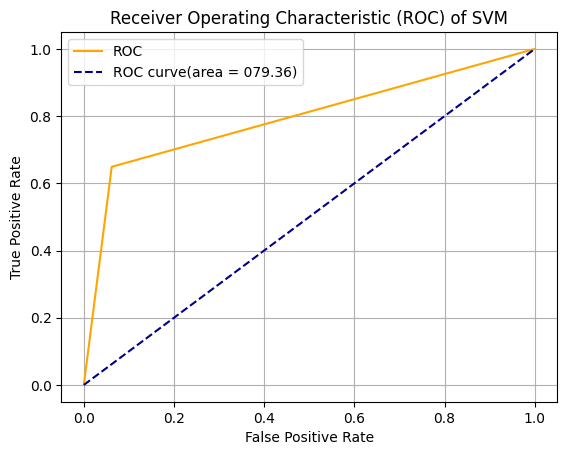

In [33]:
# Area Under Curve
auc = roc_auc_score(y_test, sv_pred)
print("ROC AUC SCORE of SVM is", auc)

from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test,sv_pred)*100,2)
print("ROC AUC SCORE of SVM is",auc)

fpr,tpr, thresholds = roc_curve(y_test, sv_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve(area = 0%.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) of SVM')
plt.legend()
plt.grid()
plt.show()